In [ ]:
!pip -qq install textblob

In [1]:
import os
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi

Fri Mar 18 03:17:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.65       Driver Version: 511.65       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   54C    P3    21W /  N/A |    990MiB /  6144MiB |     93%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
path = "C:/Users/erich/OneDrive/Erich/02_Studies/Langara/01_Data_Analytics/01_Terms_and_Courses/04_Term4_Spring_22/DANA-4850-001_Capstone/Elderly-Wellbeing"
tweets_df_path = os.path.join(path, "data", "cleaned_data", "twitter", "cleaned_elderly_tweets.csv")
tweets_df = pd.read_csv(tweets_df_path)
tweets_df

,tweet_id,date_time,author_id,place_id,place_name,region,tweet_text,cleaned_text,hashtags
0,1.496960e+18,2022-02-24T21:33:19.000Z,3.240659e+09,38d5974e82ed1a6c,"Ottawa, Ontario",Ontario,@JosephConwell7 @Reuters I live here &amp; the...,I live here and these far right bully boys pic...,[]
1,1.496950e+18,2022-02-24T20:28:33.000Z,1.469170e+18,0811cf61cd9ea52f,"Winnipeg, Manitoba",Manitoba,"Winnipeg seniors, wya?!! \nI’m doing Mini sess...","Winnipeg seniors, wya?!! Im doing Mini session...","['winnipeg', 'collegegrad']"
2,1.496940e+18,2022-02-24T20:25:13.000Z,3.355189e+09,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,This is no joke. I have gone to several stores...,This is no joke. I have gone to several stores...,[]
3,1.496930e+18,2022-02-24T19:44:18.000Z,2.130565e+07,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,@cllrainslie Vaccines are great for the elderl...,Vaccines are great for the elderly and / or th...,[]
4,1.496920e+18,2022-02-24T18:53:50.000Z,5.038248e+07,71bdc845bc7609c7,"Woodstock, Ontario",Ontario,Be part of the movement from hallway care to h...,Be part of the movement from hallway care to h...,"['Woodstock', 'Healthcare']"
...,...,...,...,...,...,...,...,...,...
57134,9.478390e+17,2018-01-01T14:36:44.000Z,7.775120e+17,13e80e6f3ac67066,"Maple Ridge, British Columbia",British Columbia,@mheavyhead I lived in India for 4 months and ...,I lived in India for 4 months and the amount o...,[]
57135,9.477170e+17,2018-01-01T06:29:56.000Z,3.164684e+09,53504716d445dcad,"Calgary, Alberta",Alberta,@CMcKerracher @themadsloth Refugees get nowher...,Refugees get nowhere close to that. That lies ...,[]
57136,9.477010e+17,2018-01-01T05:29:42.000Z,2.846543e+07,626695e48d21858b,"Brandon, Manitoba",Manitoba,“Old women find me attractive.”\n-not me,Old women find me attractive. -not me,[]
57137,9.476660e+17,2018-01-01T03:08:09.000Z,2.616188e+07,5d058f2e9fe1516c,"Halifax, Nova Scotia",Nova Scotia,(I forgot to do this for 2016.)\n\nMy favourit...,(I forgot to do this for 2016.) My favourite 2...,[]


In [ ]:
getPolarity = lambda x: TextBlob(x).sentiment.polarity
tweets_df['polarity'] = tweets_df['cleaned_text'].apply(getPolarity)
tweets_df

,tweet_id,date_time,author_id,place_id,place_name,region,tweet_text,cleaned_text,hashtags,polarity
0,1.496960e+18,2022-02-24T21:33:19.000Z,3.240659e+09,38d5974e82ed1a6c,"Ottawa, Ontario",Ontario,@JosephConwell7 @Reuters I live here &amp; the...,I live here and these far right bully boys pic...,[],0.027065
1,1.496950e+18,2022-02-24T20:28:33.000Z,1.469170e+18,0811cf61cd9ea52f,"Winnipeg, Manitoba",Manitoba,"Winnipeg seniors, wya?!! \nI’m doing Mini sess...","Winnipeg seniors, wya?!! Im doing Mini session...","['winnipeg', 'collegegrad']",0.000000
2,1.496940e+18,2022-02-24T20:25:13.000Z,3.355189e+09,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,This is no joke. I have gone to several stores...,This is no joke. I have gone to several stores...,[],-0.100000
3,1.496930e+18,2022-02-24T19:44:18.000Z,2.130565e+07,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,@cllrainslie Vaccines are great for the elderl...,Vaccines are great for the elderly and / or th...,[],0.042857
4,1.496920e+18,2022-02-24T18:53:50.000Z,5.038248e+07,71bdc845bc7609c7,"Woodstock, Ontario",Ontario,Be part of the movement from hallway care to h...,Be part of the movement from hallway care to h...,"['Woodstock', 'Healthcare']",0.000000
...,...,...,...,...,...,...,...,...,...,...
57134,9.478390e+17,2018-01-01T14:36:44.000Z,7.775120e+17,13e80e6f3ac67066,"Maple Ridge, British Columbia",British Columbia,@mheavyhead I lived in India for 4 months and ...,I lived in India for 4 months and the amount o...,[],-0.283333
57135,9.477170e+17,2018-01-01T06:29:56.000Z,3.164684e+09,53504716d445dcad,"Calgary, Alberta",Alberta,@CMcKerracher @themadsloth Refugees get nowher...,Refugees get nowhere close to that. That lies ...,[],0.000000
57136,9.477010e+17,2018-01-01T05:29:42.000Z,2.846543e+07,626695e48d21858b,"Brandon, Manitoba",Manitoba,“Old women find me attractive.”\n-not me,Old women find me attractive. -not me,[],0.450000
57137,9.476660e+17,2018-01-01T03:08:09.000Z,2.616188e+07,5d058f2e9fe1516c,"Halifax, Nova Scotia",Nova Scotia,(I forgot to do this for 2016.)\n\nMy favourit...,(I forgot to do this for 2016.) My favourite 2...,[],0.000000


In [ ]:
tweets_df['polarity'].value_counts()

 0.000000    11046
 0.500000     1871
 0.100000     1673
 0.250000     1321
 0.200000      812
             ...  
-0.007576        1
 0.019048        1
-0.106731        1
 0.324545        1
 0.069444        1
Name: polarity, Length: 8230, dtype: int64

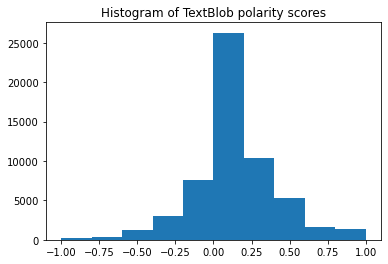

In [ ]:
plt.hist(tweets_df['polarity'])
plt.title("Histogram of TextBlob polarity scores")
plt.show()

## Transformers pipeline

In [ ]:
!pip -qq install transformers

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
test_tweets = tweets_df.loc[0:3, "cleaned_text"].tolist()
for tweet in test_tweets:
  classified = classifier(tweet)
  label = classified[-1]['label']
  score = classified[-1]['score']
  print(f"Tweet {tweet}\nclassified as {label}, with score {score}\n=========")

Tweet I live here and these far right bully boys picked on poor, elderly and vulnerable consistently, punching down like cowards, stealing food from homeless, abusing residents of women and street youth shelters threatening to sexually assault girls, smashing windows of lgbqt families..
classified as NEGATIVE, with score 0.9938686490058899
Tweet Winnipeg seniors, wya?!! Im doing Mini sessions starting March. DM me to shoot! winnipeg collegegrad
classified as NEGATIVE, with score 0.9727223515510559
Tweet This is no joke. I have gone to several stores today to try and buy incontinence products. The shelves are almost empty. Amazon deliveries dates are lengthy. Is this supply chains, truckers blocking the borders or what? Why must the elderly and disabled suffer humiliation?
classified as NEGATIVE, with score 0.9996849298477173
Tweet Vaccines are great for the elderly and / or the sick.
classified as POSITIVE, with score 0.9953591227531433


In [ ]:
# Classifying complete dataset
getTransformerPolarity = lambda x: classifier(x)

classified = classifier(tweets_df['cleaned_text'].tolist())

tweets_df = pd.concat((tweets_df, pd.DataFrame(classified)['label']), axis = 1)
tweets_df = pd.concat((tweets_df, pd.DataFrame(classified)['score']), axis = 1)

tweets_df.columns = ["tweet_id", "date_time", "author_id", "place_id",
                     "place_name", "region", "tweet_text", "cleaned_text",
                     "hashtags", "blob_polarity", "t_label", "t_score"]

tweets_df

,tweet_id,date_time,author_id,place_id,place_name,region,tweet_text,cleaned_text,hashtags,blob_polarity,t_label,t_score
0,1.496960e+18,2022-02-24T21:33:19.000Z,3.240659e+09,38d5974e82ed1a6c,"Ottawa, Ontario",Ontario,@JosephConwell7 @Reuters I live here &amp; the...,I live here and these far right bully boys pic...,[],0.027065,NEGATIVE,0.993869
1,1.496950e+18,2022-02-24T20:28:33.000Z,1.469170e+18,0811cf61cd9ea52f,"Winnipeg, Manitoba",Manitoba,"Winnipeg seniors, wya?!! \nI’m doing Mini sess...","Winnipeg seniors, wya?!! Im doing Mini session...","['winnipeg', 'collegegrad']",0.000000,NEGATIVE,0.972722
2,1.496940e+18,2022-02-24T20:25:13.000Z,3.355189e+09,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,This is no joke. I have gone to several stores...,This is no joke. I have gone to several stores...,[],-0.100000,NEGATIVE,0.999685
3,1.496930e+18,2022-02-24T19:44:18.000Z,2.130565e+07,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,@cllrainslie Vaccines are great for the elderl...,Vaccines are great for the elderly and / or th...,[],0.042857,POSITIVE,0.995359
4,1.496920e+18,2022-02-24T18:53:50.000Z,5.038248e+07,71bdc845bc7609c7,"Woodstock, Ontario",Ontario,Be part of the movement from hallway care to h...,Be part of the movement from hallway care to h...,"['Woodstock', 'Healthcare']",0.000000,POSITIVE,0.939058
...,...,...,...,...,...,...,...,...,...,...,...,...
57134,9.478390e+17,2018-01-01T14:36:44.000Z,7.775120e+17,13e80e6f3ac67066,"Maple Ridge, British Columbia",British Columbia,@mheavyhead I lived in India for 4 months and ...,I lived in India for 4 months and the amount o...,[],-0.283333,NEGATIVE,0.999078
57135,9.477170e+17,2018-01-01T06:29:56.000Z,3.164684e+09,53504716d445dcad,"Calgary, Alberta",Alberta,@CMcKerracher @themadsloth Refugees get nowher...,Refugees get nowhere close to that. That lies ...,[],0.000000,NEGATIVE,0.996904
57136,9.477010e+17,2018-01-01T05:29:42.000Z,2.846543e+07,626695e48d21858b,"Brandon, Manitoba",Manitoba,“Old women find me attractive.”\n-not me,Old women find me attractive. -not me,[],0.450000,POSITIVE,0.970412
57137,9.476660e+17,2018-01-01T03:08:09.000Z,2.616188e+07,5d058f2e9fe1516c,"Halifax, Nova Scotia",Nova Scotia,(I forgot to do this for 2016.)\n\nMy favourit...,(I forgot to do this for 2016.) My favourite 2...,[],0.000000,POSITIVE,0.998071


In [ ]:
for i, label in enumerate(tweets_df['t_label']):
  if label == 'NEGATIVE':
    transformer_polarity = -1 * tweets_df.loc[i, 't_score']
  elif label == 'POSITIVE':
    transformer_polarity = tweets_df.loc[i, 't_score']
  tweets_df.loc[i, 'transformer_polarity'] = transformer_polarity

tweets_df

,tweet_id,date_time,author_id,place_id,place_name,region,tweet_text,cleaned_text,hashtags,blob_polarity,t_label,t_score,transformer_polarity
0,1.496960e+18,2022-02-24T21:33:19.000Z,3.240659e+09,38d5974e82ed1a6c,"Ottawa, Ontario",Ontario,@JosephConwell7 @Reuters I live here &amp; the...,I live here and these far right bully boys pic...,[],0.027065,NEGATIVE,0.993869,-0.993869
1,1.496950e+18,2022-02-24T20:28:33.000Z,1.469170e+18,0811cf61cd9ea52f,"Winnipeg, Manitoba",Manitoba,"Winnipeg seniors, wya?!! \nI’m doing Mini sess...","Winnipeg seniors, wya?!! Im doing Mini session...","['winnipeg', 'collegegrad']",0.000000,NEGATIVE,0.972722,-0.972722
2,1.496940e+18,2022-02-24T20:25:13.000Z,3.355189e+09,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,This is no joke. I have gone to several stores...,This is no joke. I have gone to several stores...,[],-0.100000,NEGATIVE,0.999685,-0.999685
3,1.496930e+18,2022-02-24T19:44:18.000Z,2.130565e+07,3797791ff9c0e4c6,"Toronto, Ontario",Ontario,@cllrainslie Vaccines are great for the elderl...,Vaccines are great for the elderly and / or th...,[],0.042857,POSITIVE,0.995359,0.995359
4,1.496920e+18,2022-02-24T18:53:50.000Z,5.038248e+07,71bdc845bc7609c7,"Woodstock, Ontario",Ontario,Be part of the movement from hallway care to h...,Be part of the movement from hallway care to h...,"['Woodstock', 'Healthcare']",0.000000,POSITIVE,0.939058,0.939058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57134,9.478390e+17,2018-01-01T14:36:44.000Z,7.775120e+17,13e80e6f3ac67066,"Maple Ridge, British Columbia",British Columbia,@mheavyhead I lived in India for 4 months and ...,I lived in India for 4 months and the amount o...,[],-0.283333,NEGATIVE,0.999078,-0.999078
57135,9.477170e+17,2018-01-01T06:29:56.000Z,3.164684e+09,53504716d445dcad,"Calgary, Alberta",Alberta,@CMcKerracher @themadsloth Refugees get nowher...,Refugees get nowhere close to that. That lies ...,[],0.000000,NEGATIVE,0.996904,-0.996904
57136,9.477010e+17,2018-01-01T05:29:42.000Z,2.846543e+07,626695e48d21858b,"Brandon, Manitoba",Manitoba,“Old women find me attractive.”\n-not me,Old women find me attractive. -not me,[],0.450000,POSITIVE,0.970412,0.970412
57137,9.476660e+17,2018-01-01T03:08:09.000Z,2.616188e+07,5d058f2e9fe1516c,"Halifax, Nova Scotia",Nova Scotia,(I forgot to do this for 2016.)\n\nMy favourit...,(I forgot to do this for 2016.) My favourite 2...,[],0.000000,POSITIVE,0.998071,0.998071


In [ ]:
polarity_tweets_df_path = os.path.join(path, "word_cloud_&_sentiment_analysis", "twitter", "polarity_elderly_tweets.csv")

tweets_df.to_csv(polarity_tweets_df_path)

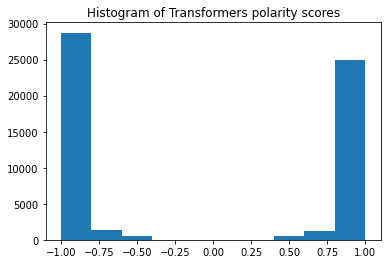

In [5]:
plt.hist(tweets_df['transformer_polarity'])
plt.title("Histogram of Transformers polarity scores")
plt.show()